In [1]:
#Importing the library used
import pandas as pd  #library used as a data analysis and manipulation tool
import regex as re  #library specify the rules for the set of possible strings that you want to match
from datetime import datetime  #module used to manipulate date and time

In [2]:
#Reading the data file in python and naming it as variable log.
log = pd.read_csv("C:/Users/singh/OneDrive/Desktop/Team Project/account_log_without_labels.csv")

In [3]:
#Cleaning and understanding data
log.shape

(3844, 6)

In [4]:
#understanding data
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  3844 non-null   object
 1   account     3844 non-null   object
 2   name        3788 non-null   object
 3   location    3178 non-null   object
 4   email       3844 non-null   object
 5   ip_address  3826 non-null   object
dtypes: object(6)
memory usage: 180.3+ KB


In [5]:
#Overview of missing values
log.describe().transpose()

,count,unique,top,freq
created_at,3844,3816,2021-11-12 11:51:50 UTC,2
account,3844,3808,lacinia_sapien,3
name,3788,3760,Sergey,3
location,3178,1658,"Manchester, United Kingdom",101
email,3844,3839,paddy.byers@gmail.com,2
ip_address,3826,3227,24.176.0.93,100


In [6]:
#casting a pandas object to a specified data type.
log['name']=log['name'].astype(str) #to use re library


In [7]:
#Creating columns in data. 
log['malicious_account_1']="" #validated names column
log['campaign_1']=""          #trends/campaign name for malicious_account_1
log['malicious_account_2']="" #validated email id column
log['campaign_2']=""          #trends/campaigns name for malicious_account_2
log['malicious_account_3']="" #validated location column
log['campaign_3']=""          #trends/campaigns name for malicious_account_3
log['malicious_account_4']="" #validated the time occurance of same ip_addres
log['campaign_4']=""          #trends/campaign name for malicious_account_4
log['validate_email']=" "   #validating email in terms of boolean
log['malicious_account_5']="" #validated the duplicate email address
log['campaign_5']=""          #trends/campaign name for malicious_account_5
log['malicious_account_final']="" #This column will contain the final data where we will sepcify if the account is malicious or not
log['campaign_final']=""          #This column will contain the final data where we will sepcify if the trends/campiagns noticed in the accounts which are considered malicious

In [8]:
pd.options.mode.chained_assignment = None  # default='warn'

In [9]:
#Validating names.
for ind in log.index: 
    if re.sub("[' ,.-]","",log['name'][ind]).isalpha(): # used the isalpha function and some common symbols
        log['malicious_account_1'][ind]='False'
    else:
        log['malicious_account_1'][ind]='True' 
        log['campaign_1'][ind] = 'invalid name'
        
    if log['name'][ind]=='nan':
        log['campaign_1'][ind] = 'missing name'

In [10]:
#calling module for validating email
from validate_email import validate_email

In [11]:
#validating email Id
log['validate_email'] = log['email'].apply(lambda x:validate_email(x)) #using lambda function, the result is reflected in validate_email column

In [12]:
# The email is validated in boolean values in column validate_email. Below is the code to determine if the account created is malicious or not using the email validationas base
def malicious_account_2(element):
    if element["validate_email"] == True:
        return 'False'
    else:
        return "True"
     

log['malicious_account_2'] = log.apply(lambda element: malicious_account_2(element), axis=1)
log['malicious_account_2'].value_counts()

False    3787
True       57
Name: malicious_account_2, dtype: int64

In [13]:
# The email is validated in boolean values in column validate_email. Below is the code to allot a campaign name to invalid email
def campaign_2(element):
    if element["validate_email"] == False:
        return "invalid email"
     

log['campaign_2'] = log.apply(lambda element: campaign_2(element), axis=1)
log['campaign_2'].value_counts()

invalid email    57
Name: campaign_2, dtype: int64

In [14]:
#Using ASCII code for python. Creating dictionary of ASCII code.
thesis={39:"",40:"",32:"",41:"",44:"",45:"",46:"",47:"",38:"",124:"",33:"",8216:"",8217:"",58:""}
#following each code means 39:', 40:(, 32:SPACE, 41:), 44:, ,45: -, 46:. , 47:/ , 124:|, 33:!, 38:&, 58-:, 8216:'‘', 8217:'’'

In [15]:
#Validating location
for ind in log.index:
    
    if not pd.isna(log['location'][ind]):
        if log['location'][ind].translate(thesis).isalnum(): #using thesis dictionary and isalnum function
            log['malicious_account_3'][ind]='False'
        else:
            log['malicious_account_3'][ind]='True' 
            log['campaign_3'][ind] = 'Invalid location'
    else:
        log['campaign_3'][ind]='Missing location'

In [16]:
#Counting no. of times email is used

counts_of_email = log["email"].value_counts()
counts_of_email = counts_of_email.to_dict()
log["counts_of_email"] = log["email"].map(counts_of_email)

In [17]:
def email(each):
    if each["counts_of_email"] > 1:
        return 'True'
    return 'False'


log['malicious_account_5'] = log.apply(lambda each: email(each), axis=1)
log['malicious_account_5'].value_counts()

False    3834
True       10
Name: malicious_account_5, dtype: int64

In [18]:
def campaign_5(element):
    if element["malicious_account_5"] == 'True':
        return "Repeated use of Email"
     

log['campaign_5'] = log.apply(lambda element: campaign_5(element), axis=1)
log['campaign_5'].value_counts()

Repeated use of Email    10
Name: campaign_5, dtype: int64

In [19]:
#Creating  list of IP addresses
list_of_IPs = []

#Ccreating 'dict' fot IP addresses
IP_dict = dict()

for ind in log.index:
    IP_Address=log['ip_address'][ind]  #assigning variable 
    time_of_creation = log['created_at'][ind]
    
    if not pd.isna(IP_Address): #if Ip address is non empty
        
        if IP_Address in IP_dict: 
            if IP_Address in list_of_IPs:
                first_instance = datetime.strptime( time_of_creation.replace(" UTC", ""), "%Y-%m-%d %H:%M:%S") 
                second_instance = datetime.strptime( IP_dict[IP_Address].replace(" UTC", ""), "%Y-%m-%d %H:%M:%S")
    
        #Validating time difference between similar IP addresses
                Difference = abs((first_instance - second_instance).total_seconds() / 60)
                if(Difference < 3.0):
                    log['malicious_account_4'][ind] = 'True'
                    log['campaign_4'][ind] = 'bot creation'
            else:
            
                list_of_IPs.append(IP_Address)
        else:
            IP_dict[IP_Address]=time_of_creation
    else:
        log['campaign_4'][ind] = 'missing ip addresses'

            
    if not pd.isna(IP_Address):
        IP_dict[IP_Address] = time_of_creation


In [20]:
#combining all maliciousaccount columsn to final malicious account
def malicious_account(row):
    if row["malicious_account_1"] == 'True':
        return 'malicious_account'
    elif row["malicious_account_2"] == 'True':
        return 'malicious_account'
    elif row["malicious_account_3"] == 'True':
        return 'malicious_account'
    elif row["malicious_account_4"] == 'True':
        return 'malicious_account'
    elif row["malicious_account_5"] == 'True':
        return 'malicious_account'
    else:
        return "non_malicious_account"

log['malicious_account_final'] = log.apply(lambda row: malicious_account(row), axis=1)
log['malicious_account_final'].value_counts()

non_malicious_account    3607
malicious_account         237
Name: malicious_account_final, dtype: int64

In [21]:
#combining all campaign name column into final campaign column. 
#if any account comes under campaign name of invalid name or invalid location and also under invalid email or bot creation
#we have considered such account in campaign of bot creation or invalid email as name and location was optional and email was mandatory and ip address was automated.
def campaign(row):
    if row["campaign_2"] == 'invalid email':
        return 'invalid_email'
    elif row["campaign_4"] == 'bot creation':
        return 'bot creation'
    elif row["campaign_5"] == 'Repeated use of Email':
        return 'Repeated use of Email'
    elif row["campaign_1"] == 'invalid name':
        return 'invalid_name'
    elif row["campaign_3"] == 'Invalid location':
        return 'invalid_location'
    else:
        return "None"

log['campaign_final'] = log.apply(lambda row: campaign(row), axis=1)
log['campaign_final'].value_counts()

None                     3607
bot creation              131
invalid_email              57
invalid_name               34
Repeated use of Email      10
invalid_location            5
Name: campaign_final, dtype: int64

In [22]:
log.to_csv("C:/Users/singh/OneDrive/Desktop/Team Project/account_log_without_labels_output.csv")

In [23]:
log['malicious_account_final'].value_counts()

non_malicious_account    3607
malicious_account         237
Name: malicious_account_final, dtype: int64

In [24]:
log['campaign_final'].value_counts()

None                     3607
bot creation              131
invalid_email              57
invalid_name               34
Repeated use of Email      10
invalid_location            5
Name: campaign_final, dtype: int64

In [25]:
#Counting no. of times same user name is  used

counts_of_username = log["account"].value_counts()
counts_of_username = counts_of_username.to_dict()
log["counts_of_username"] = log["account"].map(counts_of_username)

In [26]:
def account(each):
    if each["counts_of_username"] > 1:
        return 'True'
    return 'False'


log['repeated_username'] = log.apply(lambda each: account(each), axis=1)
log['repeated_username'].value_counts()

False    3776
True       68
Name: repeated_username, dtype: int64

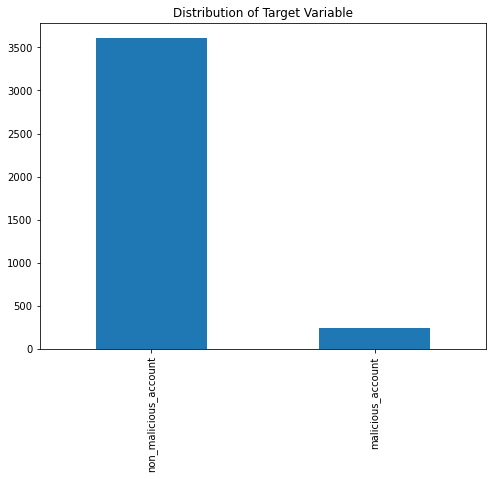

In [27]:
(log['malicious_account_final'].value_counts().plot(
        kind='bar',
        figsize=(8, 6),
        title='Distribution of Target Variable',
    )
);


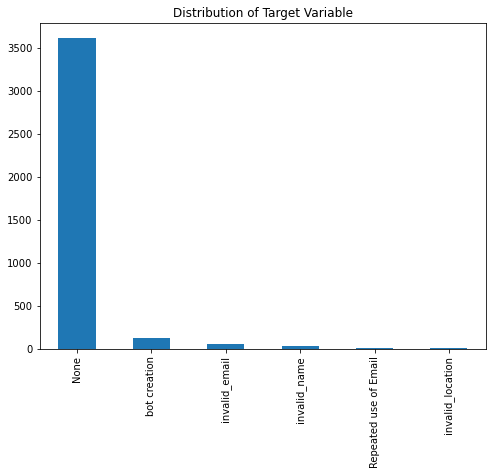

In [28]:
(log['campaign_final'].value_counts().plot(
        kind='bar',
        figsize=(8, 6),
        title='Distribution of Target Variable',
    )
);
